In [2]:
%reload_ext autoreload
%autoreload 2

from SWN_Res_Constrn import SWN_RC
import matplotlib.pyplot as plt
import numpy as np

### Time series

In [6]:
swn = SWN_RC(nepochs=20000, 
             dt=0.05, 
             lambda_o=0.11, 
             alpha=0.01,
             beta=0.002,
             plot_bifurcation=False)
swn.run_model()

LAMBDA_O=0.11, Global Order(R)=0.06092432955816944
LAMBDA_O=0.11, Global Order(R)=0.09484849014273379
LAMBDA_O=0.11, Global Order(R)=0.0817071865376242
LAMBDA_O=0.11, Global Order(R)=0.5097732226379497
LAMBDA_O=0.11, Global Order(R)=0.004358150175879966
LAMBDA_O=0.11, Global Order(R)=0.07002219744894896
LAMBDA_O=0.11, Global Order(R)=0.05844753106803193
LAMBDA_O=0.11, Global Order(R)=0.22439734770005604
LAMBDA_O=0.11, Global Order(R)=0.9226203670277483
LAMBDA_O=0.11, Global Order(R)=0.07197765641409039
0.10532756015357257


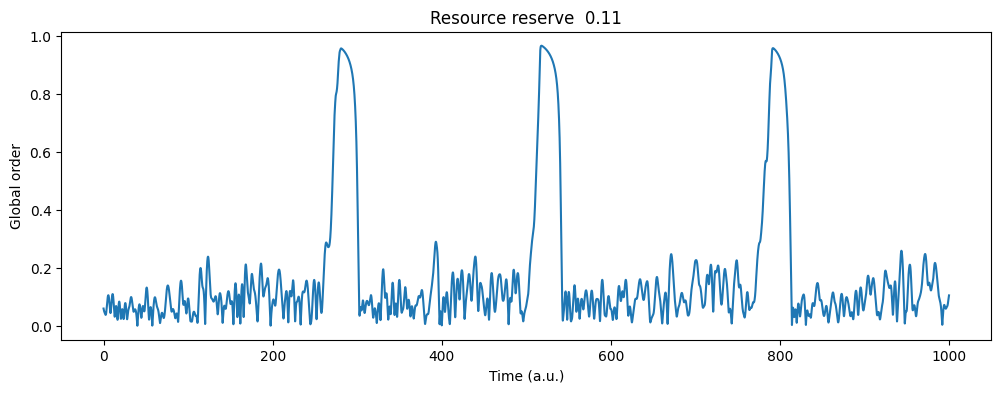

In [7]:
f = plt.figure(figsize=(12, 4))
plt.title("Resource reserve  " + str(swn.LAMBDA_O)) 
plt.plot(np.linspace(0, swn.NEPOCHS-1, swn.NEPOCHS)*swn.DT, swn.GLOBAL_ORDER_VERBOSE)
plt.ylabel("Global order")
plt.xlabel("Time (a.u.)")
plt.show()

### Bifurcation diagram

In [12]:
swn = SWN_RC(nepochs=1200000, 
             dt=0.05, 
             lambda_o=0, 
             plot_bifurcation=True, 
             epochs_per_lambda_o=20000, 
             step_size_lambda_o=0.01)
swn.run_model()

**Loading from saved file instead**

In [8]:
loaded_data = np.load("../../../../datastore/explosive_sync/Small world network/data_adaptive-a_0.01_b_0.002.npz")

GLOBAL_ORDER_VERBOSE_RC = loaded_data['arr1']
LAMBDA_O_RC_ = loaded_data['arr2']
# LAMBDA_RC_ = loaded_data['arr3'] # commenting this line for quick run

print("done")

done


In [22]:
noise = np.random.normal(loc=0.0, scale=0.005, size=LAMBDA_O_RC_.shape)
LAMBDA_O_RC_noise = LAMBDA_O_RC_ + noise

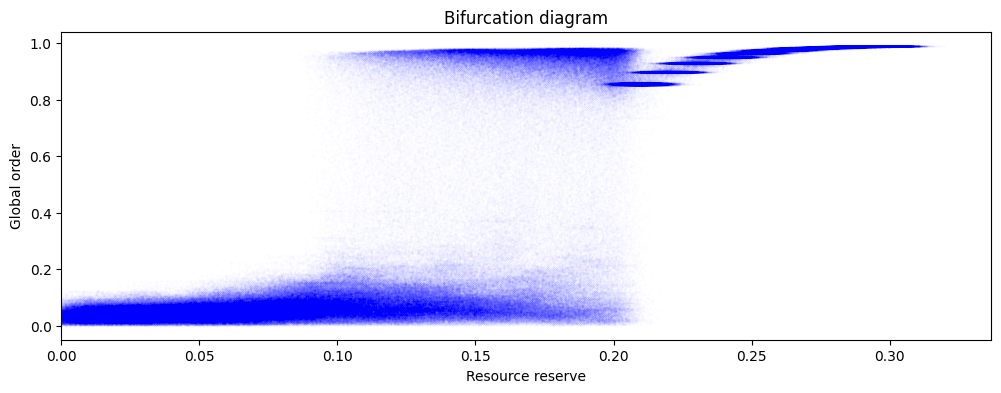

In [25]:
f = plt.figure(figsize=(12, 4))
plt.title("Bifurcation diagram") 

plt.scatter(LAMBDA_O_RC_noise, GLOBAL_ORDER_VERBOSE_RC, 
            s=0.05, alpha=0.03, color='blue')

plt.ylabel("Global order")
plt.xlabel("Resource reserve")
plt.xlim(left=0)
plt.show()